## Ячейка с импортом библиотек

In [1]:
from viewtoolbox import *
from mathtoolbox import *

%matplotlib widget 

## Моделирование фильтров

### Исходные параметры (константы)

$\bullet$ Частота дискретизации (Гц), $f_{discretization}$ $ - $ F_D;

$\bullet$ Интервал дискретизации (сек), $t_{discretization}=1/f_{discretization}$ $ - $ T_D;

$\bullet$ Интервал наблюдения (сек), $t_{window}$ $ - $ T_WIN;

$\bullet$ Порядок фильтра Баттерворта $ - $ BUT_ORDER;

$\bullet$ Порядок фильтра Чебышева $ - $ CHEB_ORDER;

$\bullet$ Внеполосное ослабление лепестков для фильтра Чебышева $ - $ S_BAND_ATTENUATION_DB.

In [2]:
# Общие параметры
F_D = 5e9   # частота дискретизации, Гц
T_D = 1/F_D # период дискретизации

# Параметры для моделирования сигнала
T_WIN = 12e-6    # длительность рассматриваемого интервала

# Параметры для моделирования фильтров
BUT_ORDER = 3   # порядок фильтра Баттерворта
CHEB_ORDER = 3  # порядок фильтра Чебышева
S_BAND_ATTENUATION_DB = 20  # внеполосное ослабление лепестков для фильтра Чебышева

### Формирование сигнала с заданными параметрами

*Параметры по варианту:*

$\bullet$ Длительность импульса (сек), $ t_{chirp}$ $ - $ t_ch;

$\bullet$ Частота несущей (Гц), $f_{carrier}$ $ - $ f_car;

$\bullet$ Тип фильтра (LP/HP/BP/BS) $ - $ f_type;

$\bullet$ Частота среза (Гц), $f_{cut}$ $ - $ f_cut_hz.

In [3]:
# Параметры для моделирования сигнала
t_ch = 2e-6    # длительность импульса (t chirp)
f_car = 140e6   # частота несущей, Гц

# Параметры для моделирования фильтров
f_type = 'BP'       # тип фильтра (LP/HP/BP/BS)
f_cut_hz = [f_car - 1/t_ch, f_car + 1/t_ch]   # частота среза, Гц

*Формирование последовательности отсчетов:*

In [4]:
s_r = generate_single_chip('radio', T_D, T_WIN, t_ch, f_car)    # р/импульс

# Циклически "сдвигаем" отсчеты сигнала, чтобы, например, видеоимпульс
# начинался не с первого же отсчета
s_r = np.roll(s_r, math.floor(len(s_r)/2))


*Отображение сигнала во временной и частотной областях:*

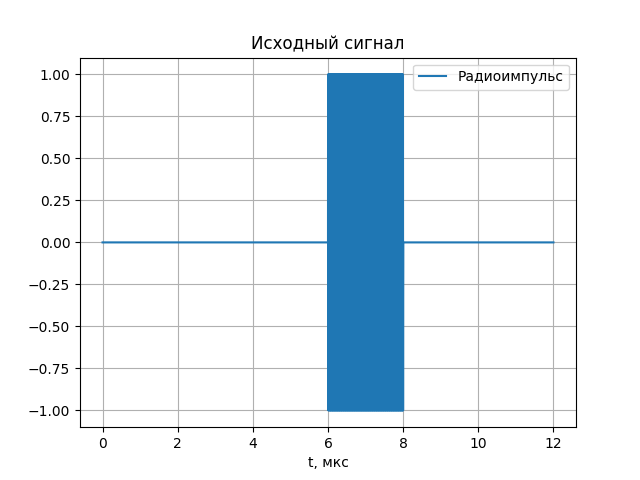

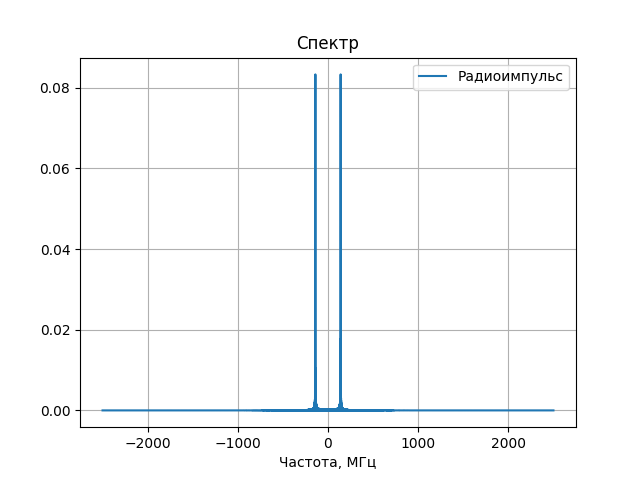

In [5]:
# "Упаковка" сигналов, на которые хотим посмотреть, в вид, распознаваемый
# функциями отрисовки. Подробности см. в описаниях функций plot_signal()
# и plot_spectrum()
signal_out = [[T_D, s_r, 'Радиоимпульс']]

plot_signal(signal_out) # отобразить сигнал
plot_spectum(signal_out)    # отобразить спектр сигнала

### Сравнение синтезированных фильтров

*Получение сигнала на выходе синтезированных фильтров:*

In [6]:
signal_in = s_r # выбрать сигнал, который будет отфильтрован.
                # Переменная нужна, чтобы во все фильтры гарантированно
                # попал один и тот же сигнал, иначе можно сравнивать
                # разные сигналы и удивлять, что они разные

# Применить к сигналу фильтры. Подробности в описании функций
signal_out_idl = apply_ideal_filter(T_D, f_type, f_cut_hz, signal_in)   # применить к сигналу идеальный фильтр
signal_out_btr = apply_butt_filter(T_D, f_type, f_cut_hz, BUT_ORDER, signal_in) # применить к сигналу ф. Баттерворта
signal_out_chb = apply_cheb2_filter(T_D, f_type, f_cut_hz, CHEB_ORDER, S_BAND_ATTENUATION_DB, signal_in)    # применить к сигналу ф. Чебышева

*Отображение осциллограммы и спектра сигналов на выходе различных фильтров:*

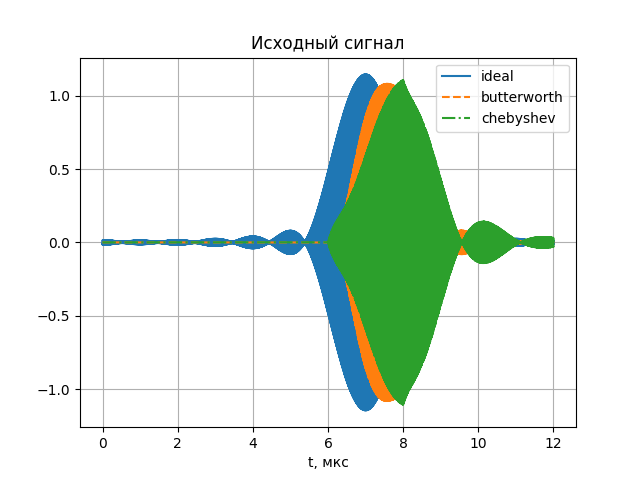

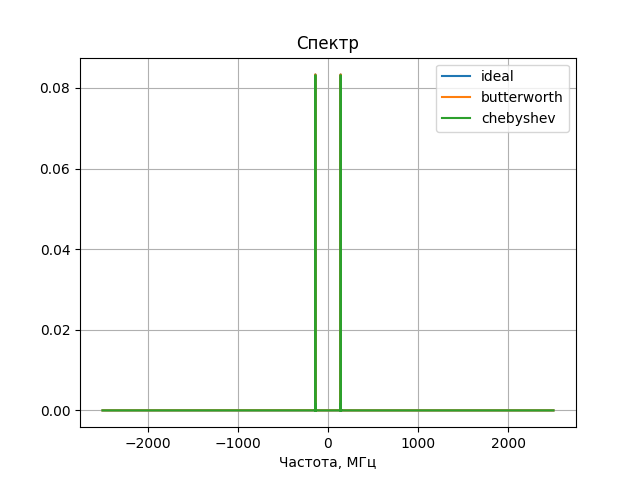

In [7]:
# Отображение данных
signal_out = [[T_D, signal_out_idl, 'ideal'],
              [T_D, signal_out_btr, 'butterworth'], 
              [T_D, signal_out_chb, 'chebyshev']] # конкатенация рез-татов фильтрации

plot_signal(signal_out) # отобразить фильтрованные сигналы
plot_spectum(signal_out) # отобразить спектр 

*Построение импульсной характеристики фильтров:*

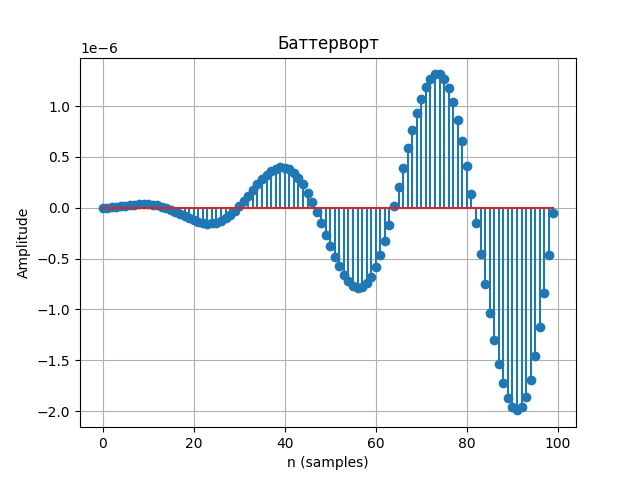

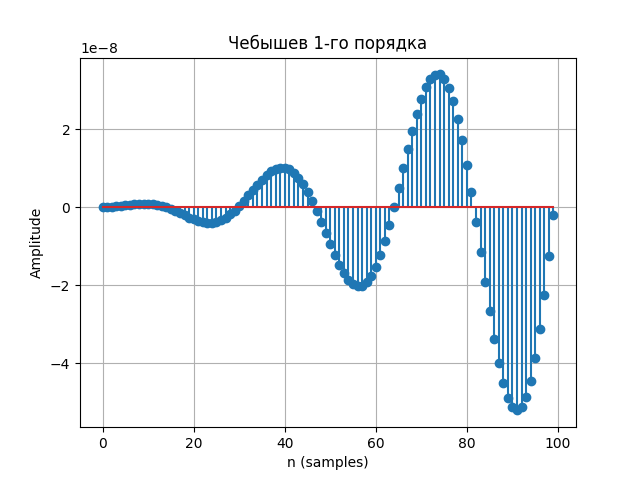

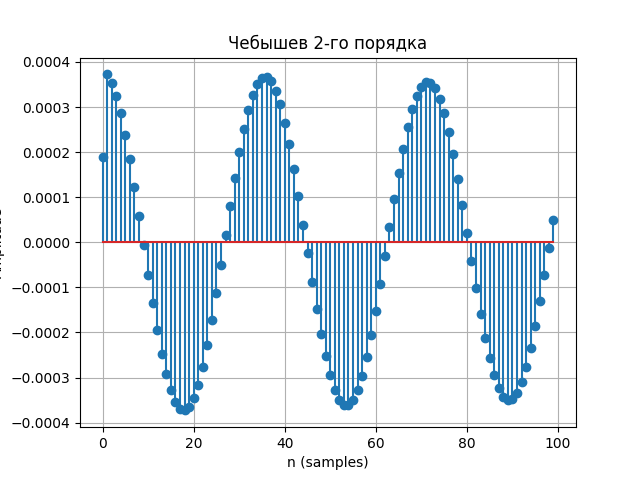

In [8]:
# Получение коэффициентов передаточной функции фильтров для построения импульсной характеристики
b_butt, a_butt = create_butt_filter(T_D, f_type, f_cut_hz, BUT_ORDER)   # формирование фильтра Баттерворта
b_cheb1, a_cheb1 = create_cheb1_filter(T_D, f_type, f_cut_hz, CHEB_ORDER, S_BAND_ATTENUATION_DB)    # формирование фильтра Чебышего 1-го порядка
b_cheb2, a_cheb2 = create_cheb2_filter(T_D, f_type, f_cut_hz, CHEB_ORDER, S_BAND_ATTENUATION_DB)    # формирование фильтра Чебышего 2-го порядка

# Отображение импульсных характеристик фильтров
impz(b_butt, a_butt, 'Баттерворт')
impz(b_cheb1,a_cheb1, 'Чебышев 1-го порядка')
impz(b_cheb2,a_cheb2, 'Чебышев 2-го порядка')

*Построение АЧХ и ФЧХ синтезированных фильтров:*

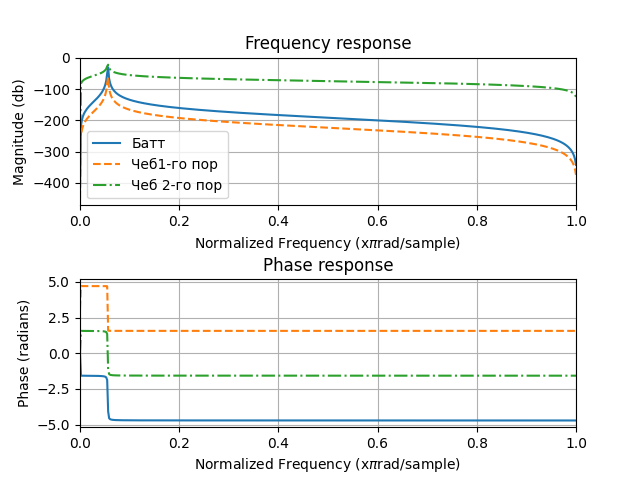

In [9]:
b = [b_butt, b_cheb1, b_cheb2]
a = [a_butt, a_cheb1, a_cheb2]
legend_filters = ['Батт', 'Чеб1-го пор', 'Чеб 2-го пор']

mfreqz3(b, a, legend_filters)